In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate alphas (use magnitudes from [4.5]-[8])
def alpha(f1,f2):
    y = 1.64*(f1-f2)-2.82
    return y

# # Convert magnitudes to flux
# def flux(m,F0):
#     F = F0*10**(m/-2.5)
#     return F
    




In [89]:
# # Load in magnitude data
# f = np.load("../Data_and_Results/Inputs_YSO_Train.npy")
# F = f.transpose() # Access data by band instead of object
# F = F[slice(0,7,2)] # Only look at bands, not errors

# # Convert magnitudes to flux
# for i, F_0 in enumerate([2.343e-10,1.212e-10,6.099e-11,2.403e-11]):
#     F[i] = flux(F[i],F_0)

# F.shape

[0.791 1.323 1.621 ... 1.27  1.617 1.59 ]


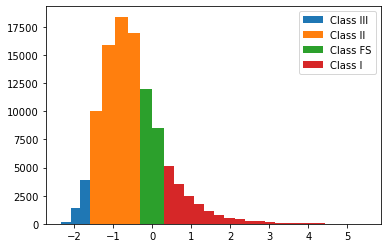

In [90]:
f2 = np.load("../Data_and_Results/Inputs_YSO_Train.npy")
f2 = f2.transpose()
f2 = f2[slice(0,7,2)]


alph2 = alpha(f2[1],f2[3])
print(f2[1]-f2[3])
# Apply cuts for different YSO classes
aIII = np.where(alph2<-1.6)
plt.hist(alph2[aIII],bins=3,label='Class III')
aII = np.where((alph2<-0.3) & (alph2>-1.6))
plt.hist(alph2[aII],bins=4,label='Class II')
aFS = np.where((alph2>-0.3) & (alph2<0.3))
plt.hist(alph2[aFS],bins=2,label='Class FS')
aI = np.where(alph2>0.3)
plt.hist(alph2[aI],bins=20,label='Class I')
# plt.hist(alph2)
plt.legend()

(array([6.7870e+03, 3.5091e+04, 3.7468e+04, 1.6414e+04, 5.5920e+03,
        1.7820e+03, 6.2500e+02, 1.7800e+02, 9.7000e+01, 1.9000e+01]),
 array([-2.32472, -1.54572, -0.76672,  0.01228,  0.79128,  1.57028,
         2.34928,  3.12828,  3.90728,  4.68628,  5.46528]),
 <BarContainer object of 10 artists>)

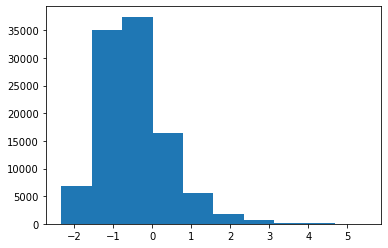

In [91]:
# Checking to see where the last bin ends so I can use this as a cut to separate stars from CIII objects in Megeath
plt.hist(alph2)

In [92]:
# Load in magnitude data
f1 = np.load("../Data_and_Results/Inputs_YSO_Test.npy")
F1 = f1.transpose() # Access data by band instead of object
F1 = F1[slice(0,7,2)] # Only look at bands, not errors

F1.shape

(4, 9971)

(array([2.000e+00, 8.000e+00, 3.100e+01, 1.560e+02, 4.560e+02, 1.546e+03,
        2.353e+03, 1.484e+03, 5.210e+02, 2.250e+02, 1.560e+02, 1.710e+02,
        2.380e+02, 3.010e+02, 3.910e+02, 3.890e+02, 3.710e+02, 2.870e+02,
        2.150e+02, 1.660e+02, 1.060e+02, 9.800e+01, 8.800e+01, 5.400e+01,
        3.600e+01, 2.400e+01, 1.800e+01, 1.400e+01, 1.000e+01, 1.200e+01,
        7.000e+00, 9.000e+00, 8.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-3.9220800e+00, -3.7354808e+00, -3.5488816e+00, -3.3622824e+00,
        -3.1756832e+00, -2.9890840e+00, -2.8024848e+00, -2.6158856e+00,
        -2.4292864e+00, -2.2426872e+00, -2.0560880e+00, -1.8694888e+00,
        -1.6828896e+00, -1.4962904e+00, -1.3096912e+00, -1.1230920e+00,
        -9.3649280e-01, -7.4989360e-01, -5.6329440e-01, -3.7669520e-01,
        -1.90096

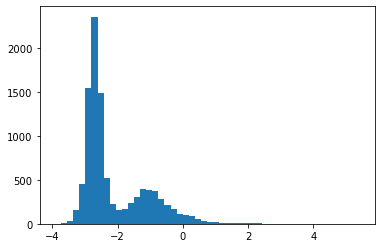

In [93]:
# Calculate alphas and plot as histogram 
alphas = alpha(F1[1],F1[3])

plt.hist(alphas, bins =50)


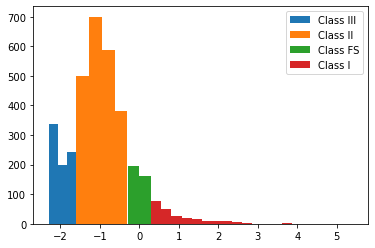

In [96]:
# Clearly many stars mixed in sample; apply cuts for different YSO classes
aIII = np.where((alphas<-1.6) & (alphas>-2.3))
plt.hist(alphas[aIII],bins=3,label='Class III')
aII = np.where((alphas<-0.3) & (alphas>-1.6))
plt.hist(alphas[aII],bins=4,label='Class II')
aFS = np.where((alphas>-0.3) & (alphas<0.3))
plt.hist(alphas[aFS],bins=2,label='Class FS')
aI = np.where(alphas>0.3)
plt.hist(alphas[aI],bins=20,label='Class I')

plt.legend()

In [97]:
Y = np.load("../Data_and_Results/Targets_YSO_Test.npy")

np.unique(Y)

array([0., 1., 3.])

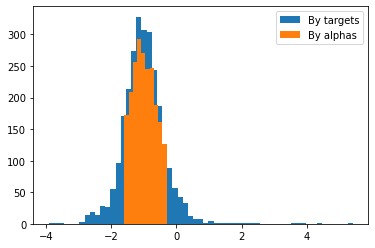

In [127]:
# Compare the cut groups vs the identified groups in Megeath/Rapson for CII

f1 = np.load("../Data_and_Results/Inputs_YSO_Test.npy")
FII = f1[np.where(Y==1.)[0]]
F2 = FII.transpose() # Access data by band instead of object
F2 = F2[slice(0,7,2)] # Only look at bands, not errors

alphasII = alpha(F2[1],F2[3])

plt.hist(alphasII,bins=59,label='By targets')
plt.hist(alphas[aII],label='By alphas')
plt.legend()